Logistic Regression은 이름에서 Regression이 들어간 것처럼, 회귀 분석 방법으로 분류 문제에 접근한다. 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수 간의 관계를 구체적인 함수로 나타내어 예측 모델에 사용한다.

# 선형 회귀(Linear Regression)
선형 회귀의 식은 다음과 같다.
$$H(X) = W^TX + b = w_1x_1 + w_2x_2 + \cdots + w_kx_k + b$$
선형 회귀는 독립 변수들과 종속 변수 간의 선형관계를 가정하고 이를 잘 나타내는 회귀계수 $W$를 데이터로부터 추정한다. 선형 회귀는 일반적으로 수치(Continuous) 예측 문제에 사용한다. 분류 모델에 사용할 경우 불가능한 것은 아니지만 예측 결과의 범위가 [$-\infty$, $\infty$]로 [0, 1]의 범위를 넘어가게 된다.

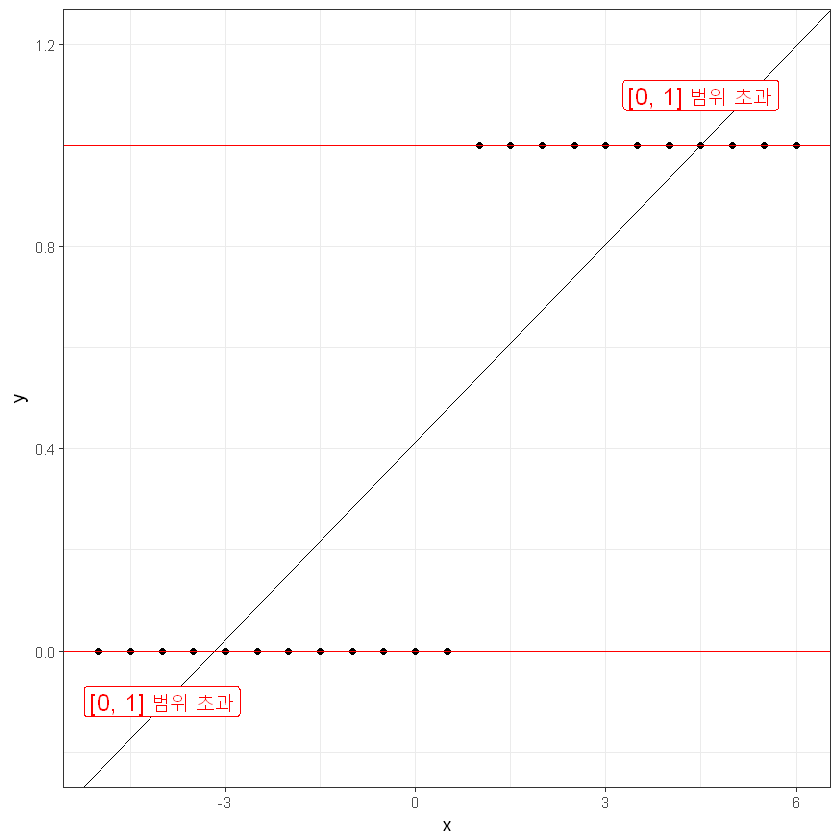

In [2]:
# Load library
library(ggplot2)

# Generate data
x <- seq(-5, 6, 0.5)
y <- c(rep(0, 12), rep(1, 11))
data <- data.frame(x = x, y = y)

# Train Linear Regression
lm.fit <- lm(y ~ x, data)

# Plot
ggplot(data, aes(x, y)) + geom_point() + 
  geom_abline(slope = lm.fit$coefficients[2], intercept = lm.fit$coefficients[1]) +
  ylim(c(-0.2, 1.2)) +
  geom_label(label = "[0, 1] 범위 초과", x = -4, y = -0.1, col = "red", size = 5) +
  geom_label(label = "[0, 1] 범위 초과", x = 4.5, y = 1.1, col = "red", size = 5) +
  geom_hline(yintercept = 0, col = "red") + geom_hline(yintercept = 1, col = "red") +
  theme_bw()

따라서 이러한 문제를 해결하기 위해 결과값인 $H(X)$를 [0, 1] 범위로 갖게 해주는 연결 함수가 필요하다.

# 시그모이드 함수(Sigmoid Function)
이항 분류 문제에 적합한 함수로 시그모이드(Sigmoid) 함수가 있다. 그래프의 모양은 아래와 같이 s자 형태로 x = 0을 중심으로 $-\infty$로 갈수록 0으로 수렴하고 $\infty$로 갈수록 1에 수렴한다. 즉, 모든 $x$값에 대해 [0, 1] 범위의 값을 갖게 해준다.
$$g(z) = \frac{1}{1 + e^{-z}} = \frac{e^z}{1 + e^z}$$

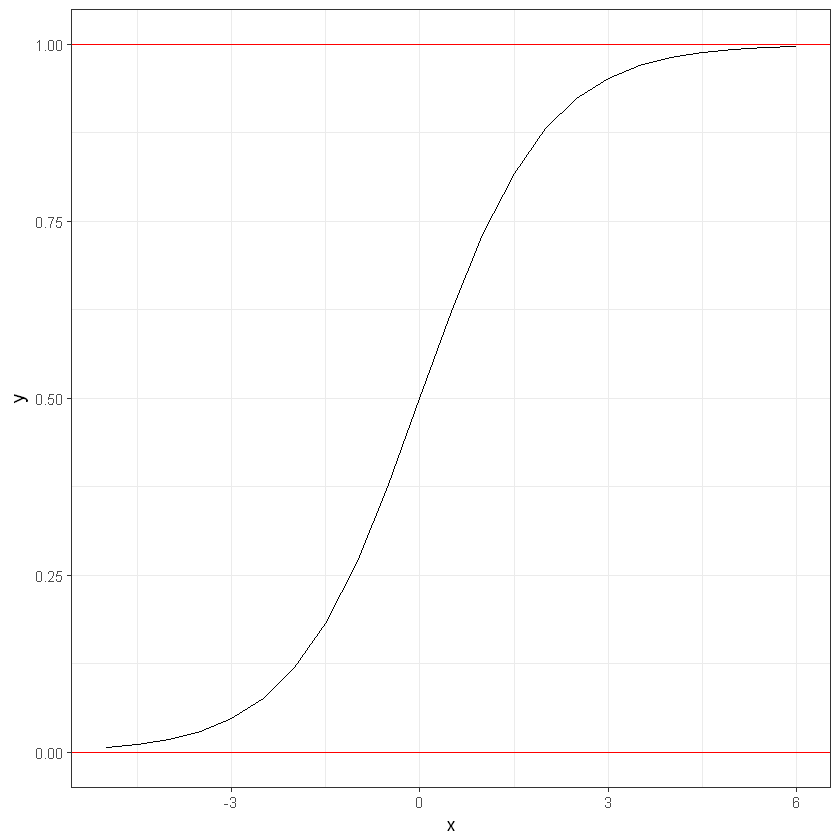

In [4]:
# Generate data
x2 <- seq(-5, 6, 0.5)
y2 <- 1/(1 + exp(-x2)) # Sigmoid function
data2 <- data.frame(x = x2, y = y2)

# Plot
ggplot(data2, aes(x, y)) + geom_line() + 
  geom_hline(yintercept = 0, col = "red") + geom_hline(yintercept = 1, col = "red") + theme_bw()

이 시그모이드 함수 $g(z)$를 사용하여 $H(X) = W^TX + b$를  $[-\infty, \infty]$ 범위에서 [0, 1] 범위로 바꾸어준다.
$$g(z) = g(W^TX + b) = \frac{1}{1 + e^{-(W^TX+b)}}$$

승산 비(Odds ratio)와 로짓 변환(logit transformation)을 통해 좀 더 자세하게 살펴보자.

## 승산 비(Odds ratio)
승산 비(Odds ratio)란 성공 확률 / 실패 확률을 나타내고 아래와 같이 표현된다.
$$\text{Odds ratio} = \frac{p(y=1 | x)}{p(y=0 | x)} = \frac{p(y=1|x)}{1-p(y=1|x)} = \frac{p}{1-p}$$

여기서 $p = p(y=1|x)$는 성공 확률을 나타내므로 [0, 1] 사이의 값을 가진다. 따라서 위의 Odds ratio는 [0, $\infty$] 사이의 값을 갖게된다.
$$\text{Odds ratio} = \begin{cases} \infty, & \text{if } p = 1 \\ 0, & \text{if } p = 0 \end{cases}$$

## 로짓 변환(logit transformation)
로짓 변환은 승산 비에 log를 취한 값으로 아래와 같이 표현된다.
$$\ln (\text{Odds ratio}) = \ln \frac{p}{1-p}$$

Odds ratio가 [0, $\infty$] 사이의 값을 가지므로 자연 로그를 취한 값의 범위는 [-$\infty$, $\infty$]이 된다.
$$\ln (\text{Odds ratio}) = \begin{cases} \infty, & \text{if } \text{Odds ratio} = \infty \\ -\infty, & \text{if } \text{Odds ratio} = 0\end{cases}$$

결국 확률 $p = p(y=1|x)$에 대해 승산 비를 구하고 거기에 자연 로그를 취했더니 [0, 1] 범위에서 [-$\infty$, $\infty$] 범위로 확장되는 함수가 만들어졌다. 이 함수를 이용하여 확률 $p$를 찾아야 하므로, 이 함수를 $p$에 대한 함수로 변환시키면 다음과 같다.

$$\ln \frac{p}{1-p} = W^TX + b$$
$$\downarrow$$
$$\frac{p}{1-p} = e^{W^TX + b}$$
$$\downarrow$$
$$\frac{1-p}{p} = \frac{1}{p} - 1 = \frac{1}{e^{W^TX + b}}$$
$$\downarrow$$
$$\frac{1}{p} = \frac{1}{e^{W^TX + b}} + 1 = \frac{1 + e^{W^TX + b}}{e^{W^TX + b}}$$
$$\downarrow$$
$$p = \frac{e^{W^X + b}}{1 + e^{W^TX + b}} = \frac{1}{1 + e^{-(W^TX + b)}}$$

# 회귀 계수 추정
선형 회귀와 마찬가지로 로지스틱 회귀에서도 회귀 계수를 추정하기 위해 경사하강법(Gradient Descent)을 사용한다. 하지만 선형 회귀에서 사용한 비용 함수(cost function)를 사용하게 될 경우, optimization problem이 non-convex가 되어서 Local Optima에 빠질 수 있다.

따라서 로지스틱 회귀에서는 다음과 같은 손실 함수를 사용한다.
$$\text{Loss Function} : L(\hat{y}, y) = -(y\log\hat{y} + (1-y)\log(1-\hat{y}))$$

손실 함수가 작을 수록 좋으므로 실제 값($y$)에 따라 손실 함수가 다음과 같이 변한다.
$$\text{Loss Function} = \begin{cases} -\log \hat{y}, & \text{if } y = 1 \rightarrow \text{가능한 큰 }\hat{y}(=1)\text{을 원함} \\ -\log (1-\hat{y}), & \text{if } y = 0 \rightarrow \text{가능한 작은 }\hat{y}(=0)\text{을 원함} \end{cases}$$

위의 손실 함수는 single training sample에 대한 것이므로, 전체 trianing sample에 대한 비용 함수는 다음과 같다.
$$\text{Cost Function} : J(W, b) = \frac{1}{m} \sum L(\hat{y}, y)$$ 
$$\text{ m = training sample 수}$$

# 실습

In [2]:
# Load library
library(caret)

# Load data
logit_data <- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
str(logit_data)
head(logit_data)

Loading required package: lattice
Loading required package: ggplot2


'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


In [3]:
# Preprocessing
logit_data$rank <- as.factor(logit_data$rank)
logit_data$admit <- as.factor(logit_data$admit)

# Split data
train_idx <- createDataPartition(logit_data$admit, p = 0.7, list = F)
train <- logit_data[train_idx,]
test <- logit_data[-train_idx,]

# Train
logit.fit <- glm(admit ~ ., data = train, family = "binomial")
summary(logit.fit)


Call:
glm(formula = admit ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6257  -0.8777  -0.5736   1.1229   2.4038  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.458401   1.429188  -3.819 0.000134 ***
gre          0.003702   0.001323   2.798 0.005141 ** 
gpa          0.940424   0.403397   2.331 0.019740 *  
rank2       -0.640340   0.377920  -1.694 0.090193 .  
rank3       -0.892252   0.405142  -2.202 0.027643 *  
rank4       -1.891791   0.543555  -3.480 0.000501 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 350.90  on 280  degrees of freedom
Residual deviance: 312.19  on 275  degrees of freedom
AIC: 324.19

Number of Fisher Scoring iterations: 4


# 해석해석해석해석
로지스틱 회귀에서 회귀 계수가 의미하는 것은 변수가 한 단위 증가했을 때 log(Odds)의 증가량이다.

In [4]:
anova.result <- anova(logit.fit, test="Chisq")
anova.result

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,280,350.8998,NA
gre,1,17.726253,279,333.1736,2.550818e-05
gpa,1,6.313439,278,326.8601,1.198262e-02
rank,3,14.665372,275,312.1948,2.126135e-03


In [13]:
library(pscl)
pR2(logit.fit)[4]

McFadden 
0.1103023

In [5]:
# Predict
logit.proc <- predict(logit.fit, newdata = test, type = "response")
logit.pred <- ifelse(logit.proc >= 0.5, 1, 0)

# Create confusion matrix
confusionMatrix(logit.pred, test$admit, positive = "1", mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 75 29
         1  6  9
                                          
               Accuracy : 0.7059          
                 95% CI : (0.6154, 0.7858)
    No Information Rate : 0.6807          
    P-Value [Acc > NIR] : 0.3148208       
                                          
                  Kappa : 0.1939          
 Mcnemar's Test P-Value : 0.0002003       
                                          
            Sensitivity : 0.23684         
            Specificity : 0.92593         
         Pos Pred Value : 0.60000         
         Neg Pred Value : 0.72115         
              Precision : 0.60000         
                 Recall : 0.23684         
                     F1 : 0.33962         
             Prevalence : 0.31933         
         Detection Rate : 0.07563         
   Detection Prevalence : 0.12605         
      Balanced Accuracy : 0.58138         
                                    

# ROC Curve

In [1]:
# Threshold 별 ROC Curve 그리기